In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
dataset = pd.read_csv('multiple_linear_regression.csv')

In [5]:
dataset.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [6]:
dataset.describe()

,Feature 1,Feature 2,Feature 3,Target
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
dataset.count()

Feature 1    200
Feature 2    200
Feature 3    200
Target       200
dtype: int64

Splitting Dataset

In [8]:
output_col = 'Target'
x = dataset.iloc[:, dataset.columns != output_col]
y = dataset.loc[:,output_col]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 43)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr_model = LinearRegression()

In [12]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [13]:
lr_model.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [14]:
lr_model.intercept_

np.float64(3.077774495528045)

In [15]:
predictions = lr_model.predict(x_test)

In [16]:
len(x_test)

60

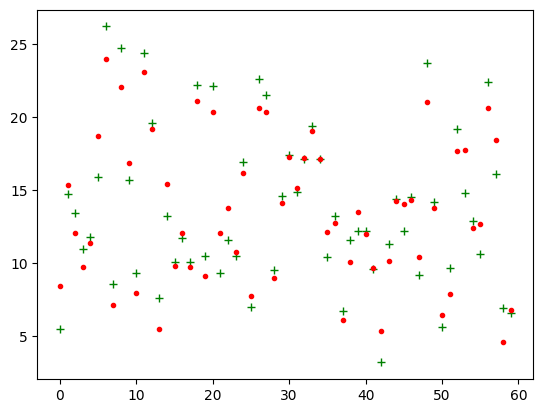

In [35]:
plt.plot(y_test.values, '+', color='green', label="Actual Values")
plt.plot(predictions, '.', color='red', label="Predicted Values")

In [18]:
residuals = predictions - y_test

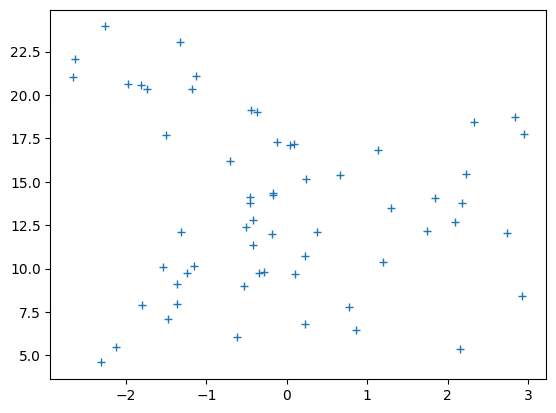

In [19]:
plt.plot(residuals,predictions, '+')

OLS Method

In [20]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [21]:
import statsmodels.api as sm

In [22]:
x_with_constant = sm.add_constant(x_train)

In [23]:
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [24]:
model = sm.OLS(y_train, x_with_constant)

In [25]:
result = model.fit()

In [26]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [27]:
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.67e-63
Time:                        00:34:32   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.000       2.291       3.865
Feature 1      0.0460      0.002     26.108      0.000       0.042       0.049
Feature 2      0.1809      0.010     17.575      0.000       0.161       0.201
Feature 3     -0.0019      0.007     -0.280      0.780      -0.016       0.012
==============================================================================
Omnibus:                       51.703   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.812
Skew:                          -1.502   Prob(JB):                     3.93e-29
Kurtosis:                       6.661   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
x_with_constant = x_with_constant.drop(columns="Feature 3")

In [29]:
x_with_constant

,const,Feature 1,Feature 2
71,1.0,109.8,14.3
90,1.0,134.3,4.9
100,1.0,222.4,4.3
44,1.0,25.1,25.7
94,1.0,107.4,14.0
...,...,...,...
58,1.0,210.8,49.6
21,1.0,237.4,5.1
49,1.0,66.9,11.7
64,1.0,131.1,42.8


In [30]:
model = sm.OLS(y_train, x_with_constant)

In [31]:
results = model.fit()

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     523.8
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           6.70e-65
Time:                        00:34:32   Log-Likelihood:                -276.51
No. Observations:                 140   AIC:                             559.0
Df Residuals:                     137   BIC:                             567.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0427      0.376      8.085      0.000       2.298       3.787
Feature 1      0.0460      0.002     26.211      0.000       0.042       0.049
Feature 2      0.1801      0.010     18.306      0.000       0.161       0.200
==============================================================================
Omnibus:                       51.128   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.947
Skew:                          -1.494   Prob(JB):                     2.71e-28
Kurtosis:                       6.583   Cond. No.                         439.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""